# Exploratory data analysis

## Plot my viewing history

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
df = pd.read_csv('merged_data.csv')

### Plot my viewing history of all videos, by channels, by specific video

Visualize average count per month for each year

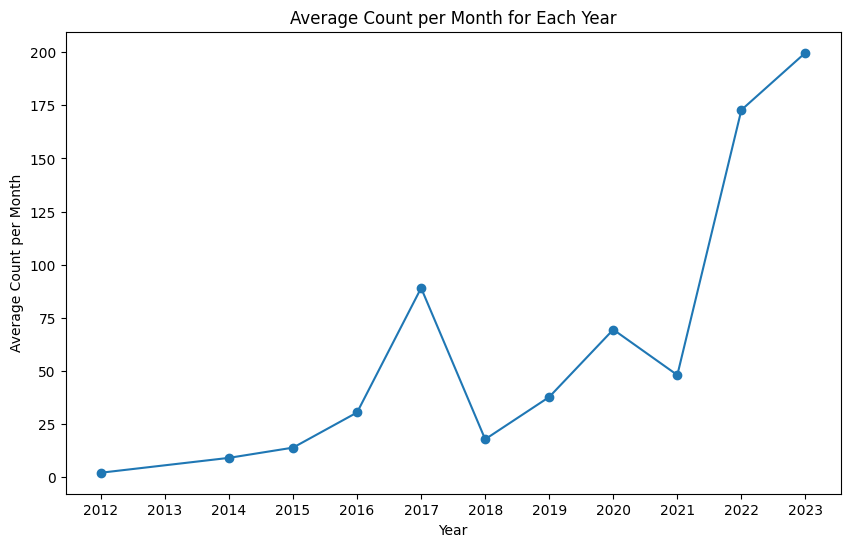

In [3]:
# Calculate the average count per month for each year
average_counts = df.groupby(['Year', 'Month']).size().groupby('Year').mean()
fig, ax = plt.subplots(figsize=(10, 6))
average_counts.plot(kind='line', marker='o', ax=ax)
x_ticks = np.arange(2012, 2024)  # Generate tick positions at every 2 hours
ax.set_xticks(x_ticks)  # Set the tick positions
ax.set_xticklabels(x_ticks)  # Set the tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Average Count per Month')
ax.set_title('Average Count per Month for Each Year')
plt.savefig('fig1-countbyyear.png')
plt.show()


Visualize the average count of videos based on the hour of the day

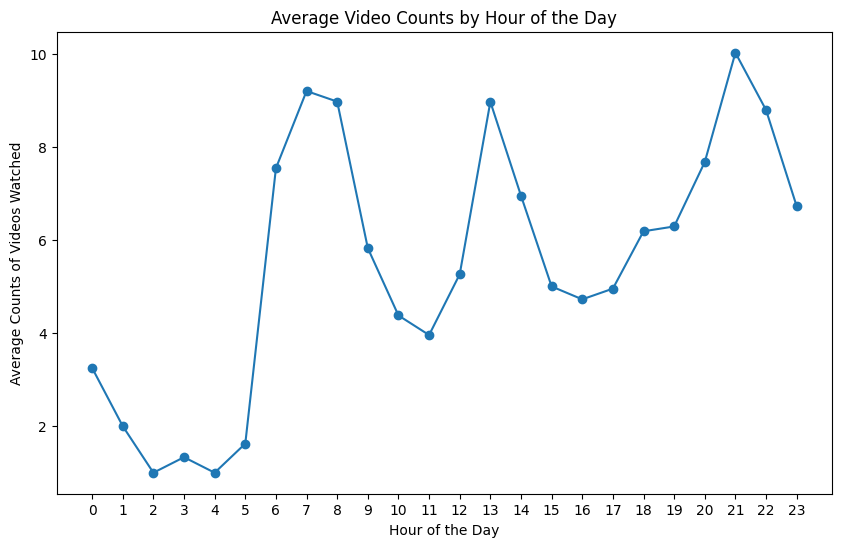

In [4]:
average_counts = df.groupby(['Year', 'Month', 'Hour']).size().groupby('Hour').mean()
fig, ax = plt.subplots(figsize=(10, 6))
average_counts.plot(kind='line', marker='o', ax=ax)
x_ticks = np.arange(0, 24)  # Generate tick positions at every 2 hours
ax.set_xticks(x_ticks)  # Set the tick positions
ax.set_xticklabels(x_ticks)  # Set the tick labels
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Counts of Videos Watched')
ax.set_title('Average Video Counts by Hour of the Day')
plt.savefig('fig2-countbyhour.png')


Plot the channel counts since 2016

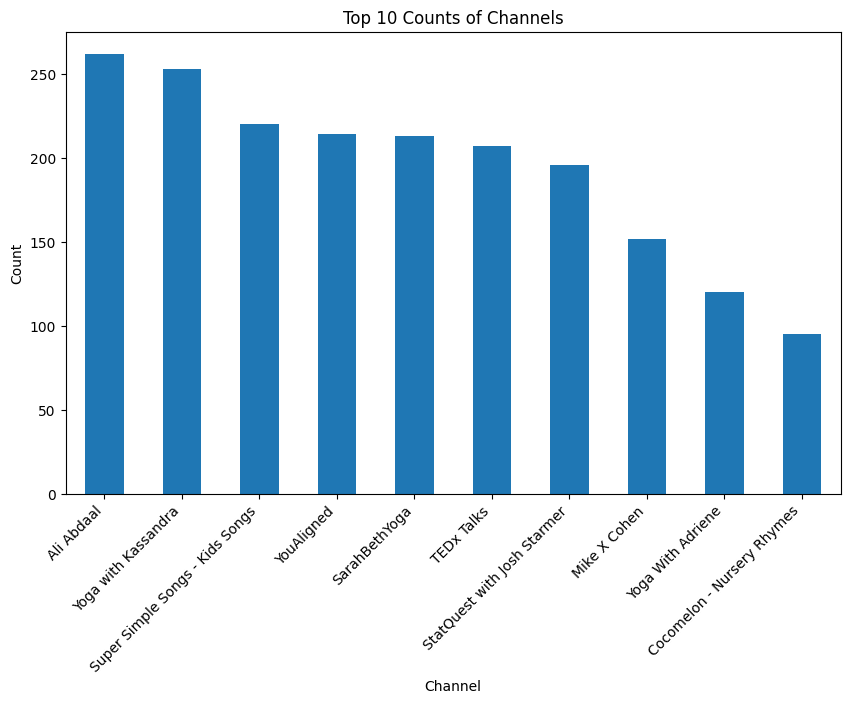

In [20]:
channel_counts = df.query("Year >= 2016")['ChannelTitle'].value_counts().head(10)
plt.figure(figsize=(10, 6))
chart = channel_counts.plot(kind='bar')
chart.set_xticklabels(channel_counts.index, rotation=45, ha='right')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Top 10 Counts of Channels')
plt.savefig('fig3-countbychannel.png')
plt.show()

For the top 4 selected channels, plot total count along time, area under the curve

In [14]:
df['ChannelTitle'].value_counts().nlargest(10).index

Index(['Ali Abdaal', 'Yoga with Kassandra', 'Super Simple Songs - Kids Songs',
       'YouAligned', 'SarahBethYoga', 'TEDx Talks',
       'StatQuest with Josh Starmer', 'Mike X Cohen', 'Yoga With Adriene',
       'Cocomelon - Nursery Rhymes'],
      dtype='object')

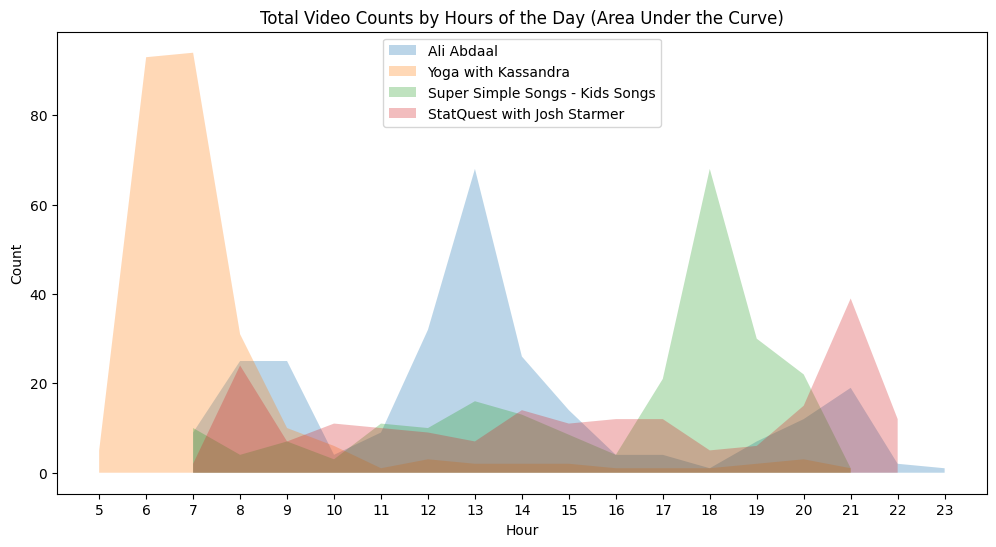

In [18]:
items = ['Ali Abdaal', 'Yoga with Kassandra', 'Super Simple Songs - Kids Songs', 'StatQuest with Josh Starmer']
fig, ax = plt.subplots(figsize=(12, 6))
for i, channel in enumerate(items):
    channel_counts = df[df['ChannelTitle'] == channel]['Hour'].value_counts().sort_index()
    ax.fill_between(channel_counts.index, 0, channel_counts.values, alpha=0.3, label=channel)
x_ticks = np.arange(5, 24)  # Generate tick positions at every 2 hours
ax.set_xticks(x_ticks)  # Set the tick positions
ax.set_xticklabels(x_ticks)  # Set the tick labels
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Total Video Counts by Hours of the Day (Area Under the Curve)')
ax.legend(loc='upper center')  # Position the legend to the top-left corner
plt.savefig('fig4-countbychannel_hour.png')
plt.show()

### Use word cloud to visualize the content of most watched videos

In [23]:
from collections import Counter
from wordcloud import WordCloud

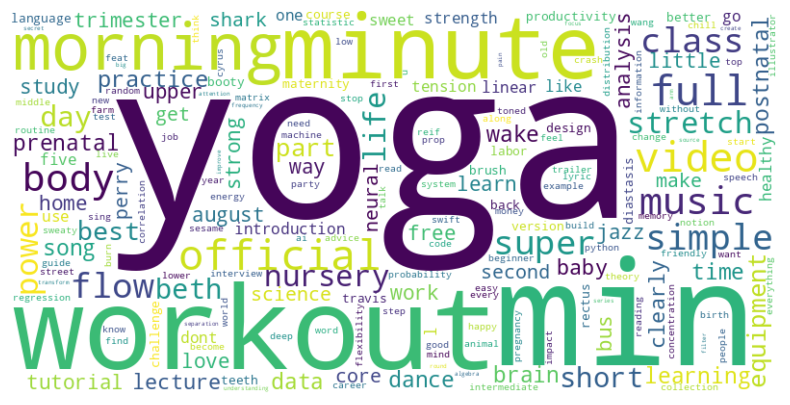

In [36]:
combined_text = ' '.join(df['TitleClean'].dropna())
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('fig5-videoname-wordcloud.png')
plt.show()

## Visualize information about Categories

Visualize top categories over all years

<Figure size 1000x600 with 0 Axes>

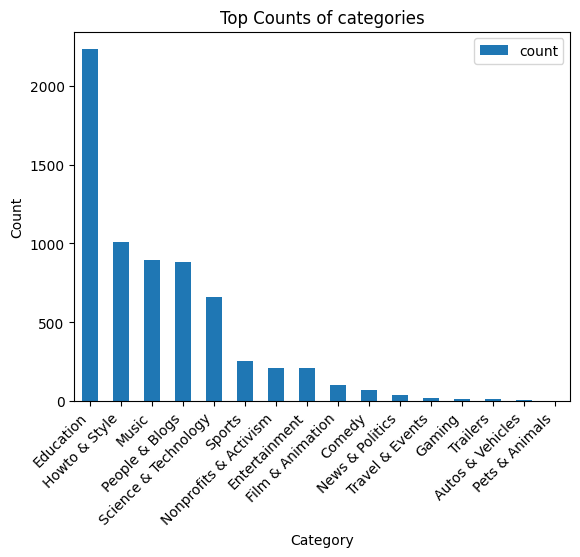

In [37]:
category_counts = df["CategoryName"].value_counts().reset_index()
category_counts.columns = ["CategoryName", "count"]
category_counts = category_counts.sort_values("count", ascending=False)
plt.figure(figsize=(10, 6))
chart = category_counts.plot(kind='bar')
chart.set_xticklabels(category_counts['CategoryName'], rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top Counts of categories')
plt.savefig('fig6-topcategory.png')
plt.show()

Visualizing Categories for each year: top 5

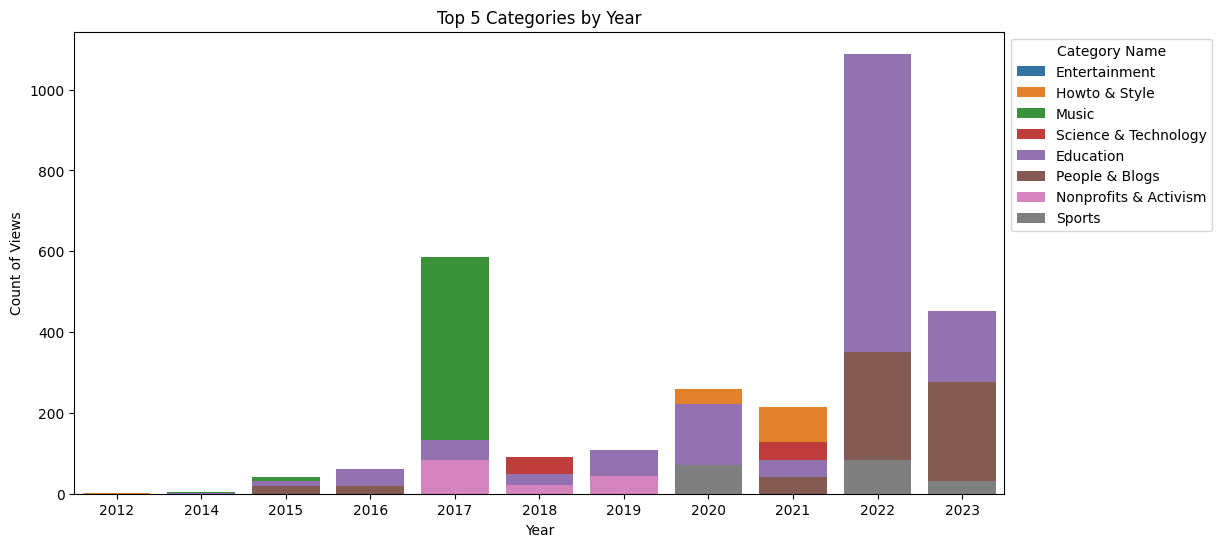

In [38]:
category_counts = df.groupby(["Year", "CategoryName"]).size().reset_index(name="count")
category_counts = category_counts.sort_values(["Year", "count"], ascending=[True, False])
category_counts = category_counts.groupby("Year").head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='count', hue='CategoryName', data=category_counts, width=0.8, dodge=False)
plt.title('Top 5 Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count of Views')
plt.legend(title='Category Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('fig7-topcategory-year.png')
plt.show()


Visualizing Video Categories by hour: top 5

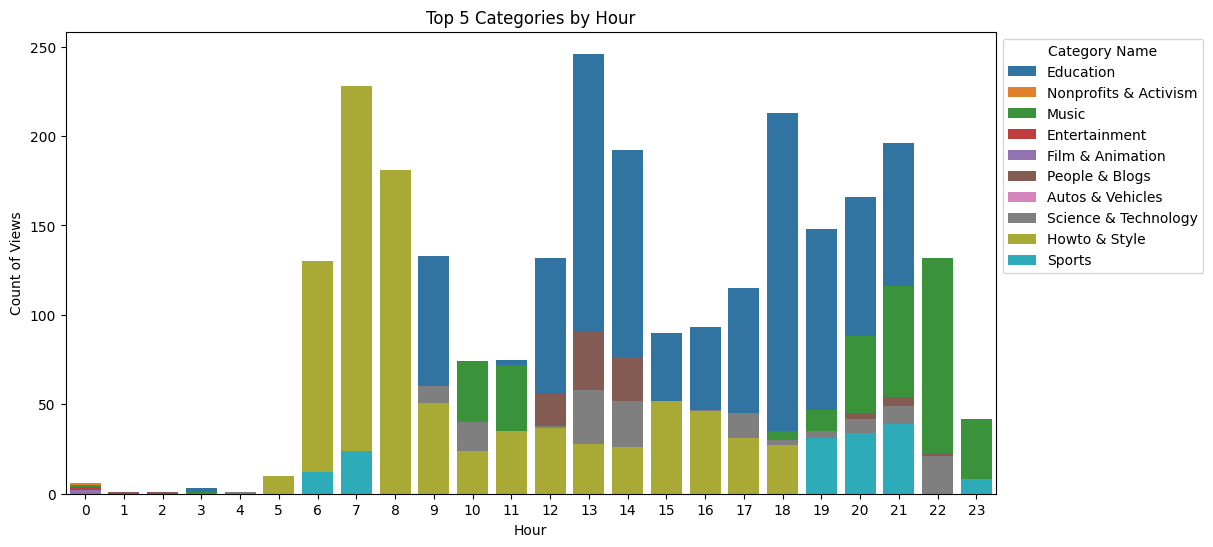

In [39]:
category_counts = df.groupby(["Hour", "CategoryName"]).size().reset_index(name="count")
category_counts = category_counts.sort_values(["Hour", "count"], ascending=[True, False])
category_counts = category_counts.groupby("Hour").head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='count', hue='CategoryName', data=category_counts, width=0.8, dodge=False)
plt.title('Top 5 Categories by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Views')
plt.legend(title='Category Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('fig8-topcategory-hour.png')
plt.show()